In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries

# This analysis examines the relationship between crude oil prices (CL) and the iShares US Transportation ETF (IYT) price.
# Using historical data from Alpha Vantage, I investigated the correlation between these two variables over the past 5 and 20 years.


# There is a strong positive correlation between changes in crude oil prices and changes in the IYT ETF price in the last 20 years.
# This correlation has been relatively consistent over the past 20 years, but there are periods of stronger and weaker correlation.
# Statistical tests confirm the significance of the observed correlation.
# The findings suggest that changes in crude oil prices have a significant impact on the transportation sector.

#Research question: How does an increase in crude oil prices impact the iShares US Transportation ETF?

#Hypothesis: An increase in crude oil prices negatively impacts the iShares US Transportation ETF
#Null Htpothesis: An increase in crude oil prices has no effect on the iShares US Transportation ETF

In [98]:
ts = TimeSeries(key='', output_format='pandas')  #Initialize a TimeSeries object from the alpha_vantage library 
df, meta_data = ts.get_daily(symbol='IYT', outputsize='full')# store it in a pandas DataFrame


In [99]:
#five year span IYT

df, meta_data = ts.get_daily(symbol='IYT', outputsize='full') # Assign the output to two variables
df.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'}, inplace=True) # Rename the columns
df = df.reset_index()  # Reset the index to make 'date a column
df.rename(columns={'index': 'date'}, inplace=True) #Rename the column containing the dates to 'date'
dfIYT_5 = df[df['date'] >= (pd.to_datetime('today') - pd.DateOffset(years=5))].copy() # Filter the DataFrame to include data for the past 5 years
split_date2 = pd.to_datetime('2024-03-07') # Define a specific date for a stock split adjustment
split_ratio2 = 4 # Define the split ratio for the adjustment
dfIYT_5['Close_adjusted'] = dfIYT_5['Close'].copy()  # Initialize with original 'Close'
dfIYT_5.loc[dfIYT_5['date'] >= split_date2, 'Close_adjusted'] = dfIYT_5.loc[dfIYT_5['date'] >= split_date2, 'Close'] * split_ratio2 # Adjust the 'Close_adjusted' values for dates after the split date by multiplying with the split ratio




In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5287 non-null   datetime64[ns]
 1   Open    5287 non-null   float64       
 2   High    5287 non-null   float64       
 3   Low     5287 non-null   float64       
 4   Close   5287 non-null   float64       
 5   Volume  5287 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 248.0 KB


In [101]:
df.isnull().sum()

date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [102]:
#five year span CL
df2, meta_data2 = ts.get_daily(symbol='CL', outputsize='full') # Assign the output to two variables
df2.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'}, inplace=True) # Rename the columns
df2 = df2.reset_index()  # Reset the index to make 'date a column
df2.rename(columns={'index': 'date'}, inplace=True) #Rename the column containing the dates to 'date'
df2['date'] = pd.to_datetime(df2['date']) #Convert the 'date' column to datetime format
dfCL_5 = df2[df2['date'] >= (pd.to_datetime('today') - pd.DateOffset(years=5))] # Filter the DataFrame to include data for the past 5 years

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6277 entries, 0 to 6276
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6277 non-null   datetime64[ns]
 1   Open    6277 non-null   float64       
 2   High    6277 non-null   float64       
 3   Low     6277 non-null   float64       
 4   Close   6277 non-null   float64       
 5   Volume  6277 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 294.4 KB


In [104]:
df2.isnull().sum()

date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [105]:
#20 year span IYT
dfIYT_20 = df[df['date'] >= (pd.to_datetime('today') - pd.DateOffset(years=20))].copy() # Filter the DataFrame to include data for the past 20 years
split_date2 = pd.to_datetime('2024-03-07') # Define a specific date for a stock split adjustment
split_ratio2 = 4 # Define the split ratio for the adjustment
dfIYT_20['Close_adjusted'] = dfIYT_20['Close'].copy()  # Initialize with original 'Close'
dfIYT_20.loc[dfIYT_20['date'] >= split_date2, 'Close_adjusted'] = dfIYT_20.loc[dfIYT_20['date'] >= split_date2, 'Close'] * split_ratio2 # Adjust the 'Close_adjusted' values for dates after the split date by multiplying with the split ratio


In [106]:

dfCL_20 = df2[df2['date'] >= (pd.to_datetime('today') - pd.DateOffset(years=20))].copy() # Filter the DataFrame to include data for the past 20 years
split_date = pd.to_datetime('2013-05-16') # Define a specific date for a stock split adjustment
split_ratio = 2 # Define the split ratio for the adjustment
dfCL_20['Close_adjusted'] = dfCL_20['Close'].copy()  # Initialize with original 'Close'
dfCL_20.loc[dfCL_20['date'] >= split_date, 'Close_adjusted'] = dfCL_20.loc[dfCL_20['date'] >= split_date, 'Close'] * split_ratio # Adjust the 'Close_adjusted' values for dates after the split date by multiplying with the split ratio




In [107]:
#merged 5 year span
merged_df5 = pd.merge(dfCL_5, dfIYT_5, on='date', suffixes=('_cl', '_iyt'))# Create a merged df with suffix added to distinguish between the two datasets
merged_df5['Close_cl_adjusted'] = merged_df5['Close_cl'] * 2 # Adjusting the scale for the split 2013
correlation_5 = merged_df5['Close_cl_adjusted'].corr(merged_df5['Close_adjusted']) # Calculate the correlation
correlation_5

0.5983154102472784

In [108]:
#merged 20 year span
merged_df20 = pd.merge(dfCL_20, dfIYT_20, on='date', suffixes=('_cl', '_iyt')) # Create a merged df with suffix added to distinguish between the two datasets
correlation_20 = merged_df20['Close_adjusted_cl'].corr(merged_df20['Close_adjusted_iyt']) # Calculate the correlation
correlation_20

0.9087522278523419

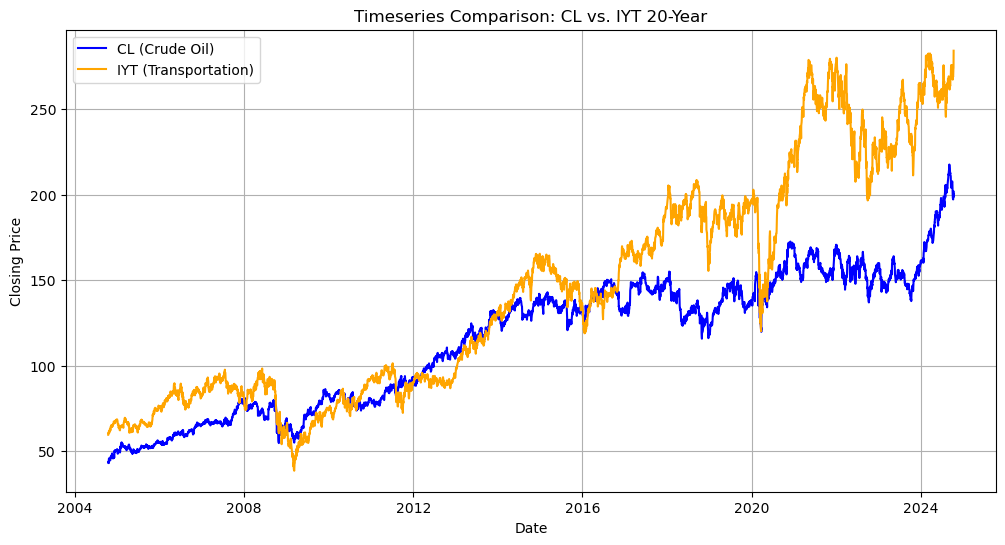

In [109]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(merged_df20['date'], merged_df20['Close_adjusted_cl'], label='CL (Crude Oil)', color='blue')
plt.plot(merged_df20['date'], merged_df20['Close_adjusted_iyt'], label='IYT (Transportation)', color='orange')

plt.title('Timeseries Comparison: CL vs. IYT 20-Year')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

In [110]:

oil_prices = merged_df20['Close_adjusted_cl']  # Crude oil prices
transportation_etf = merged_df20['Close_adjusted_iyt']  # Transportation ETF prices

# Perform the t-test for correlation (one-tailed, negative correlation)
correlation = oil_prices.corr(transportation_etf)
n = len(oil_prices)  # Number of data points
t_statistic = correlation * np.sqrt((n - 2) / (1 - correlation**2))  # Calculate the t-statistic for the correlation

# Calculate one-tailed p-value for negative correlation
if correlation < 0:  # If the correlation is negative
  p_value = stats.t.cdf(t_statistic, df=n - 2) # Calculate the p-value
else:  # Positive or zero correlation
  p_value = 1 - stats.t.cdf(t_statistic, df=n - 2) # Calculate the p-value for the opposite tail

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")

T-statistic: 154.44958078544224
P-value: 0.0
Reject the null hypothesis.


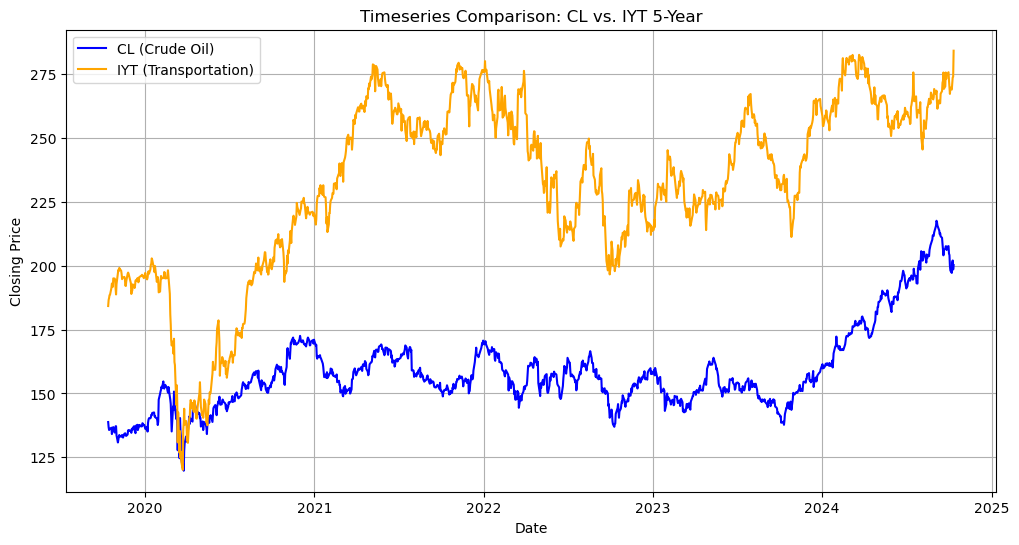

In [111]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(merged_df5['date'], merged_df5['Close_cl_adjusted'], label='CL (Crude Oil)', color='blue')
plt.plot(merged_df5['date'], merged_df5['Close_adjusted'], label='IYT (Transportation)', color='orange')

plt.title('Timeseries Comparison: CL vs. IYT 5-Year')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

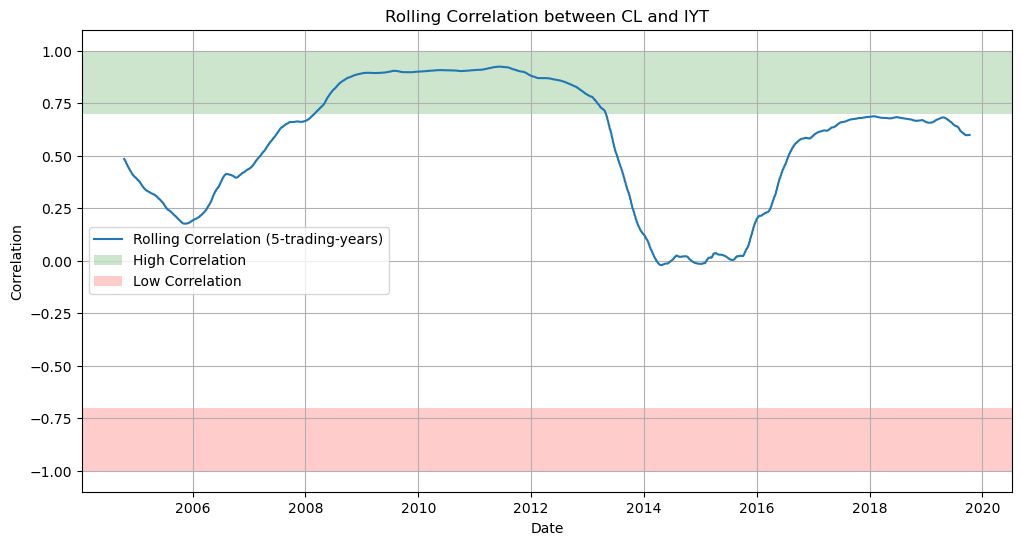

In [112]:
rolling_corr = dfCL_20['Close_adjusted'].rolling(window=1260).corr(dfIYT_20['Close_adjusted'])

plt.figure(figsize=(12, 6))
plt.plot(dfCL_20['date'], rolling_corr, label='Rolling Correlation (5-trading-years)')
plt.axhspan(0.7, 1, facecolor='green', alpha=0.2, label='High Correlation')
plt.axhspan(-1, -0.7, facecolor='red', alpha=0.2, label='Low Correlation')

plt.title('Rolling Correlation between CL and IYT')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()